In [1]:
!pip install fredapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datascience import * 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import curve_fit
import math
from math import *
import seaborn as sns
import itertools
from fredapi import Fred
%matplotlib inline

  Using cached fredapi-0.5.2-py3-none-any.whl.metadata (5.0 kB)
Using cached fredapi-0.5.2-py3-none-any.whl (11 kB)


In [2]:
my_api_key = 'd409e53dac0d797ebe854764d77a6da8'

In [3]:
fred = Fred(api_key=my_api_key)

In [33]:
real_investment_df = pd.DataFrame(fred.get_series('GPDICA'))
real_investment_years = real_investment_df.index.astype('string')
real_investment_years = real_investment_years.str.split('-').str[0].astype(int)
real_investment_values = real_investment_df.values.astype(object)
real_investment_df['Year'] = real_investment_years
real_investment_df['Billions of Chained 2017 Dollars'] = real_investment_df[0]
real_investment_df['Growth Rate'] = real_investment_df['Billions of Chained 2017 Dollars'].pct_change() * 100
real_investment_df = real_investment_df[['Year', 'Billions of Chained 2017 Dollars', 'Growth Rate']]
real_investment_df.fillna(0).reset_index(drop=True)

,Year,Billions of Chained 2017 Dollars,Growth Rate
0,1929,125.432,0.000000
1,1930,85.428,-31.892978
2,1931,55.534,-34.993211
3,1932,20.483,-63.116289
4,1933,27.705,35.258507
...,...,...,...
91,2020,3612.095,-4.542641
92,2021,3929.202,8.779033
93,2022,4164.331,5.984141
94,2023,4169.221,0.117426


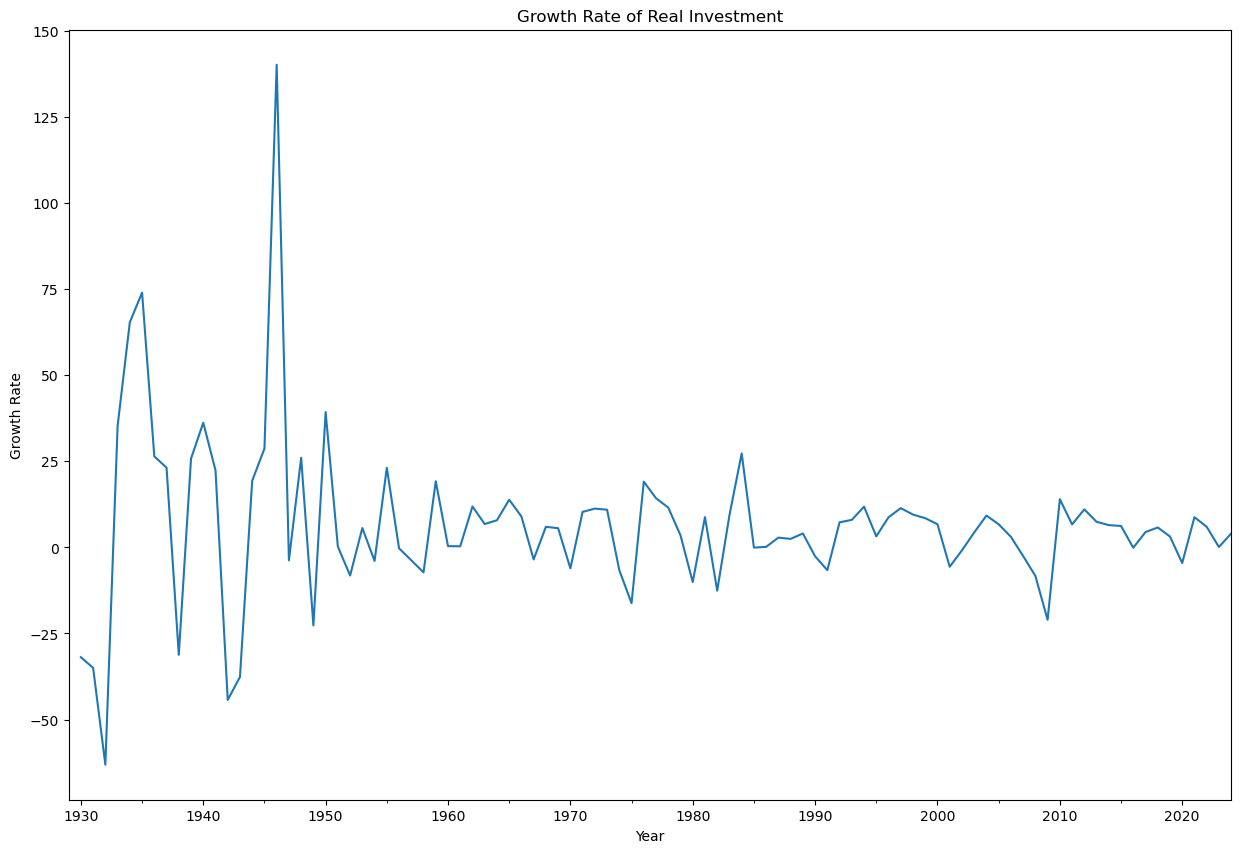

In [34]:
fred.get_series('GPDICA', units='pc1', frequency='a').plot(figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Growth Rate of Real Investment');

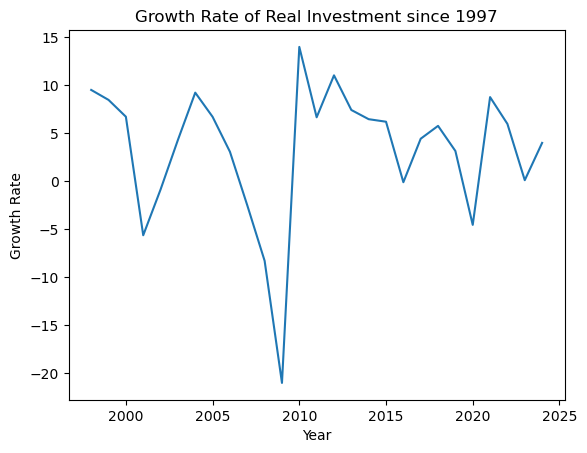

In [35]:
# Plotting
cs_since1997 = capital_stock_df[capital_stock_df['Year'] > 1997]
plt.plot(cs_since1997['Year'], cs_since1997['Growth Rate'])
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Growth Rate of Real Investment since 1997');

In [36]:
real_gdp_df = pd.DataFrame(fred.get_series('GDPCA'))
real_gdp_years = real_gdp_df.index.astype('string')
real_gdp_years = real_gdp_years.str.split('-').str[0].astype(int)
real_gdp_values = real_gdp_df.values.astype(object)
real_gdp_df['Year'] = real_gdp_years
real_gdp_df['Billions of Chained 2017 Dollars'] = real_gdp_df[0]
real_gdp_df['Growth Rate'] = real_gdp_df['Billions of Chained 2017 Dollars'].pct_change() * 100
real_gdp_df = real_gdp_df[['Year', 'Billions of Chained 2017 Dollars', 'Growth Rate']]
real_gdp_df.fillna(0).reset_index(drop=True)

,Year,Billions of Chained 2017 Dollars,Growth Rate
0,1929,1191.124,0.000000
1,1930,1089.785,-8.507846
2,1931,1019.977,-6.405667
3,1932,888.414,-12.898624
4,1933,877.431,-1.236248
...,...,...,...
91,2020,20267.585,-2.163029
92,2021,21494.798,6.055053
93,2022,22034.828,2.512375
94,2023,22671.096,2.887556


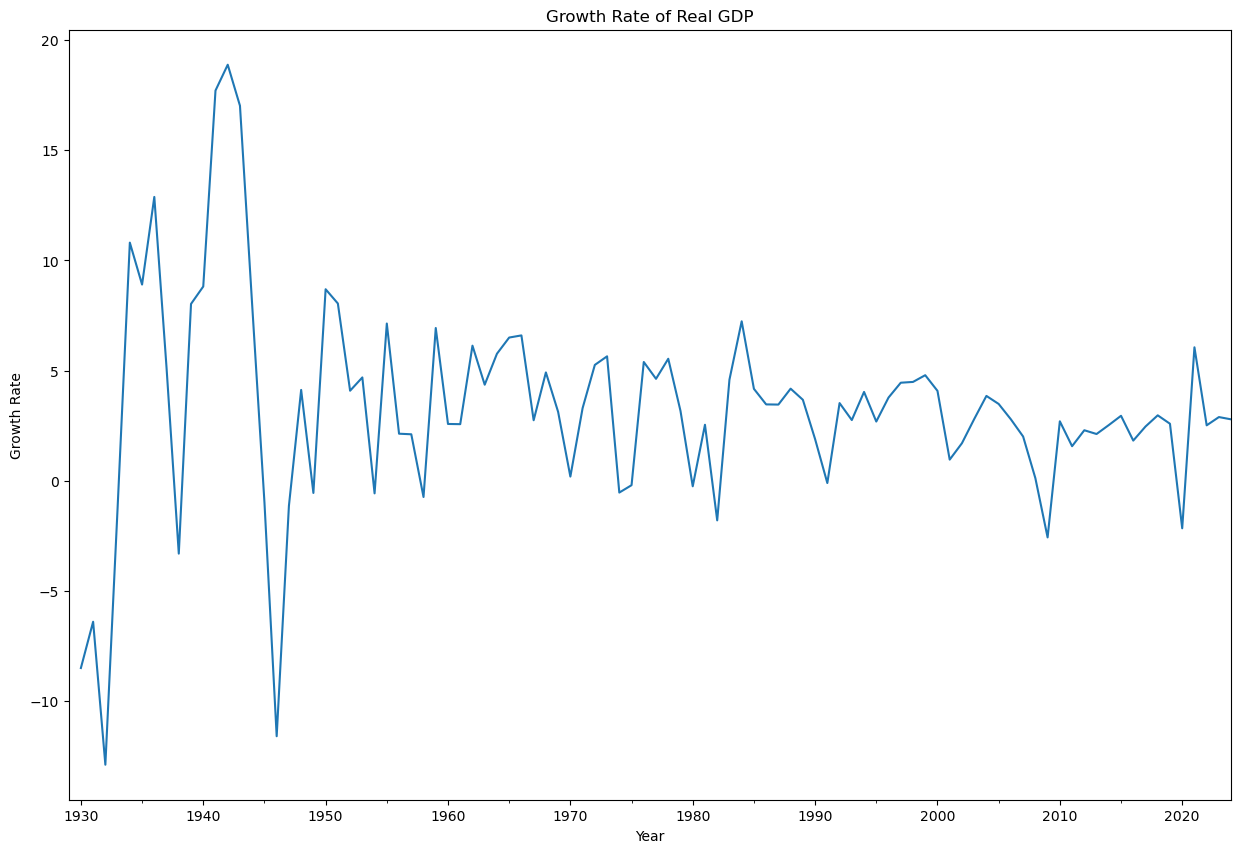

In [37]:
fred.get_series('GDPCA', units='pc1', frequency='a').plot(figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Growth Rate of Real GDP');

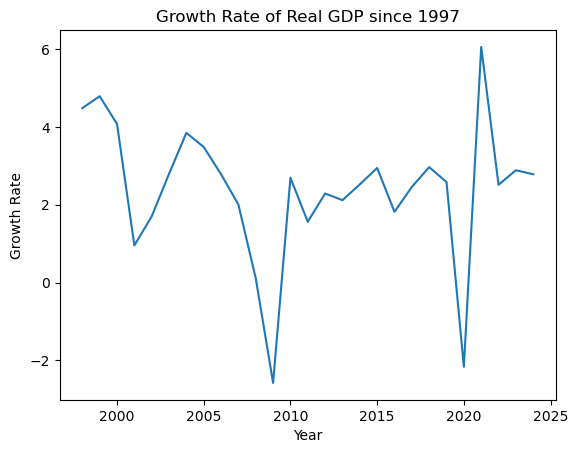

In [38]:
# Plotting
gdp_since1997 = real_gdp_df[real_gdp_df['Year'] > 1997]
plt.plot(gdp_since1997['Year'], gdp_since1997['Growth Rate'])
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Growth Rate of Real GDP since 1997');

In [49]:
capital_stock_df = pd.DataFrame(fred.get_series('RKNANPUSA666NRUG'))
capital_stock_years = capital_stock_df.index.astype('string')
capital_stock_years = capital_stock_years.str.split('-').str[0].astype(int)
capital_stock_values = capital_stock_df.values.astype(object)
capital_stock_df['Year'] = capital_stock_years
capital_stock_df['Millions of 2017 US Dollars'] = capital_stock_df[0]
capital_stock_df['Growth Rate'] = capital_stock_df['Millions of 2017 US Dollars'].pct_change() * 100
capital_stock_df['Growth Rate'] = capital_stock_df['Growth Rate'].astype(float)
capital_stock_df = capital_stock_df[['Year', 'Millions of 2017 US Dollars', 'Growth Rate']]
capital_stock_df.fillna(0).reset_index(drop=True)

,Year,Millions of 2017 US Dollars,Growth Rate
0,1950,10563268.0,0.000000
1,1951,10898386.0,3.172484
2,1952,11258935.0,3.308279
3,1953,11667803.0,3.631498
4,1954,12058041.0,3.344571
...,...,...,...
65,2015,65053556.0,1.458369
66,2016,65971328.0,1.410795
67,2017,66940280.0,1.468747
68,2018,68005632.0,1.591496


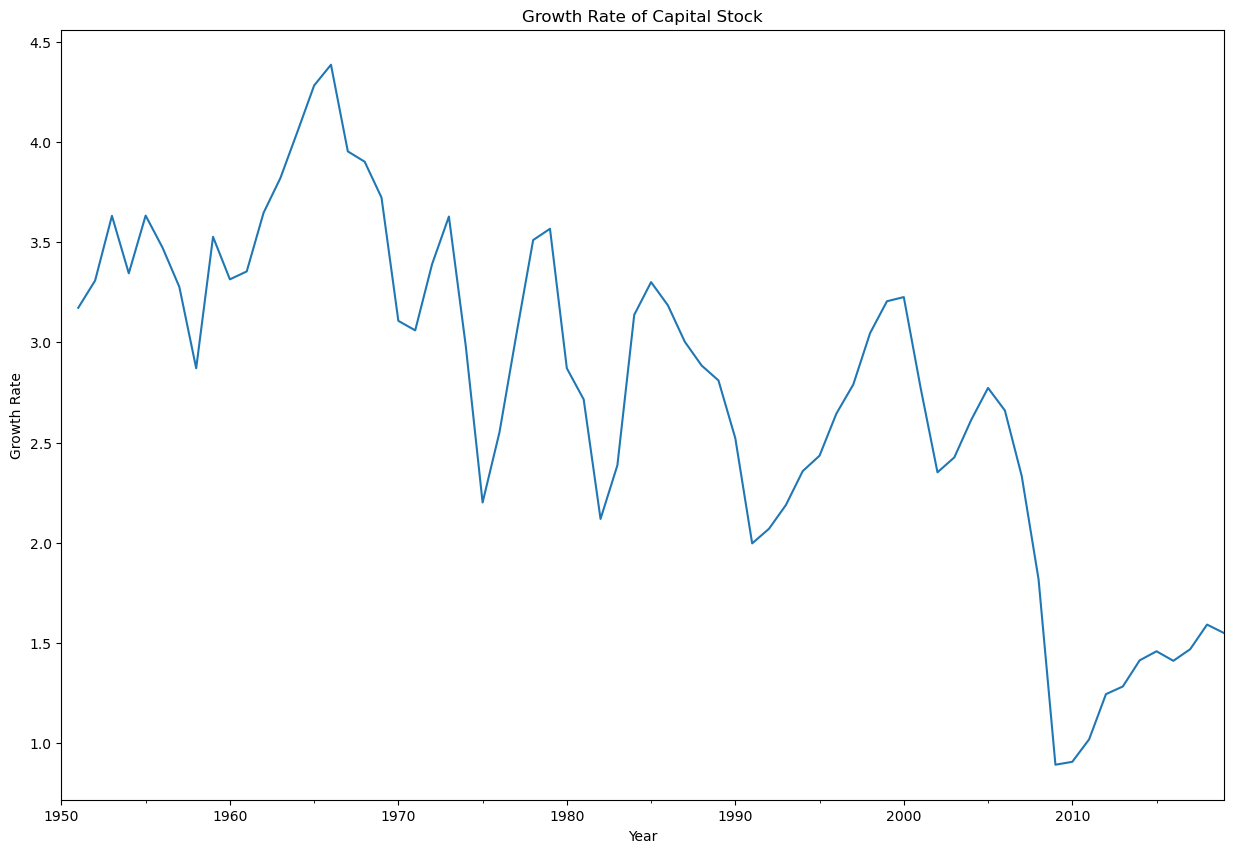

In [41]:
fred.get_series('RKNANPUSA666NRUG', units='pc1', frequency='a').plot(figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Growth Rate of Capital Stock');

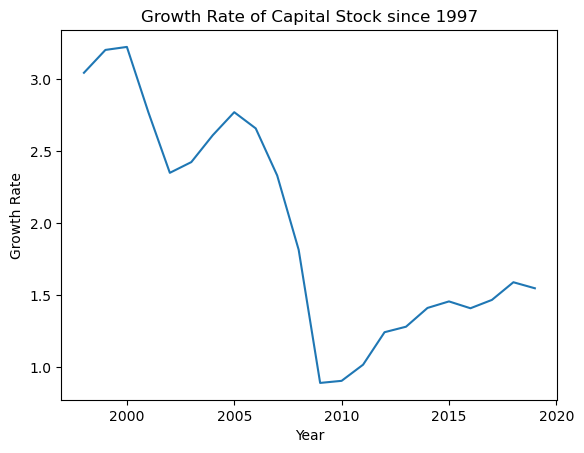

In [43]:
# Plotting
cap_stock_since1997 = capital_stock_df[capital_stock_df['Year'] > 1997]
plt.plot(cap_stock_since1997['Year'], cap_stock_since1997['Growth Rate'])
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Growth Rate of Capital Stock since 1997');

In [83]:
comparison_df = pd.DataFrame()
comparison_df['gdp minus capital stock'] = real_gdp_df['Growth Rate'] - capital_stock_df['Growth Rate']
comparison_df['real investments'] = real_investment_df['Growth Rate']
comparison_df['Year'] = comparison_df.index.astype('string').str.split('-').str[0].astype(int)
comparison_df = comparison_df[~comparison_df['gdp minus capital stock'].isna()]
comparison_df = comparison_df[['Year', 'gdp minus capital stock', 'real investments']]

comparison_df.reset_index(drop=True)

,Year,gdp minus capital stock,real investments
0,1951,4.872479,0.241011
1,1952,0.775679,-8.168030
2,1953,1.056286,5.618747
3,1954,-3.921649,-3.932278
4,1955,3.501930,23.117554
...,...,...,...
64,2015,1.487181,6.212670
65,2016,0.408657,-0.094753
66,2017,0.988875,4.440224
67,2018,1.375009,5.779597


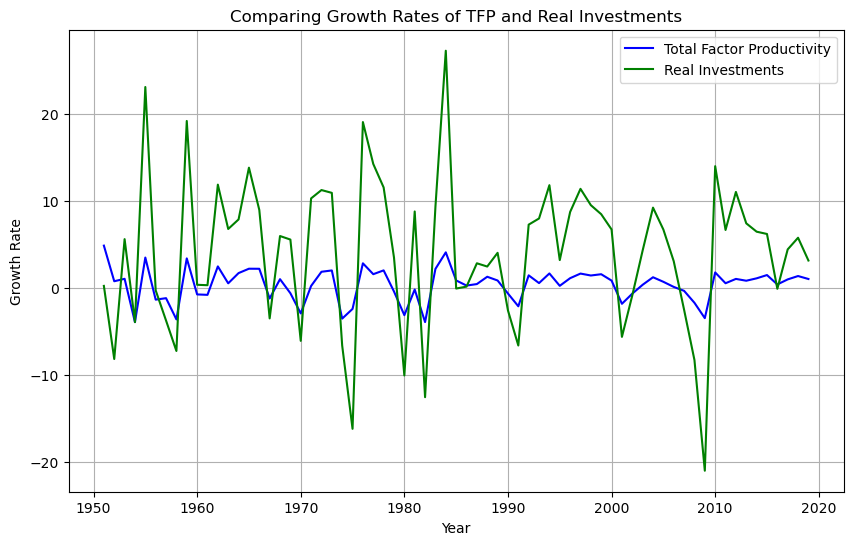

In [94]:
#plt.plot(figsize=(15, 10))
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Year'], comparison_df['gdp minus capital stock'], label='Total Factor Productivity', color='blue')
plt.plot(comparison_df['Year'], comparison_df['real investments'], label='Real Investments', color='green')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Comparing Growth Rates of TFP and Real Investments');
plt.legend()
plt.grid(True)
plt.show()

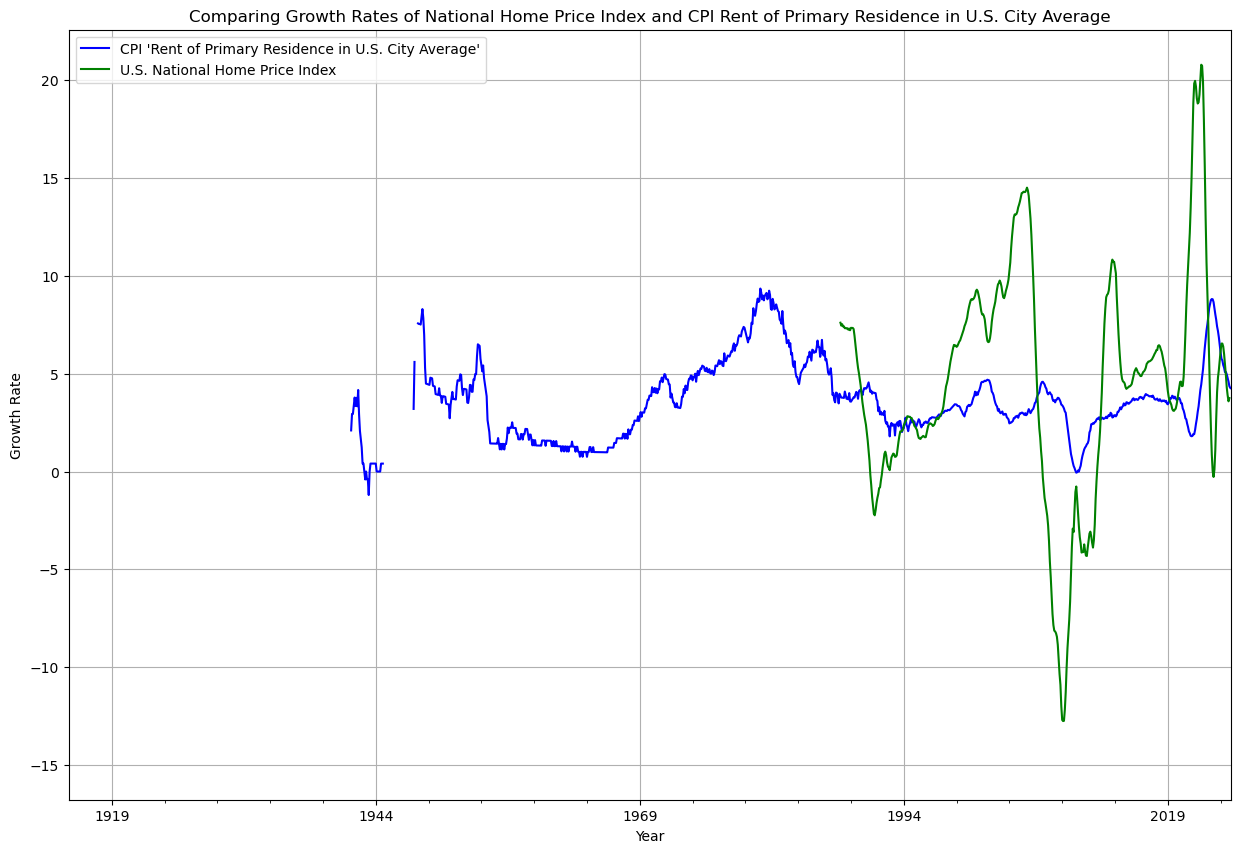

In [126]:
fred.get_series('CUUR0000SEHA', units='pc1', frequency='m').plot(figsize=(15, 10), label="CPI 'Rent of Primary Residence in U.S. City Average'", color='blue')
fred.get_series('CSUSHPINSA', units='pc1', frequency='m').plot(figsize=(15, 10), label='U.S. National Home Price Index', color='green')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Comparing Growth Rates of National Home Price Index and CPI Rent of Primary Residence in U.S. City Average');
plt.legend()
plt.grid(True)
plt.show()

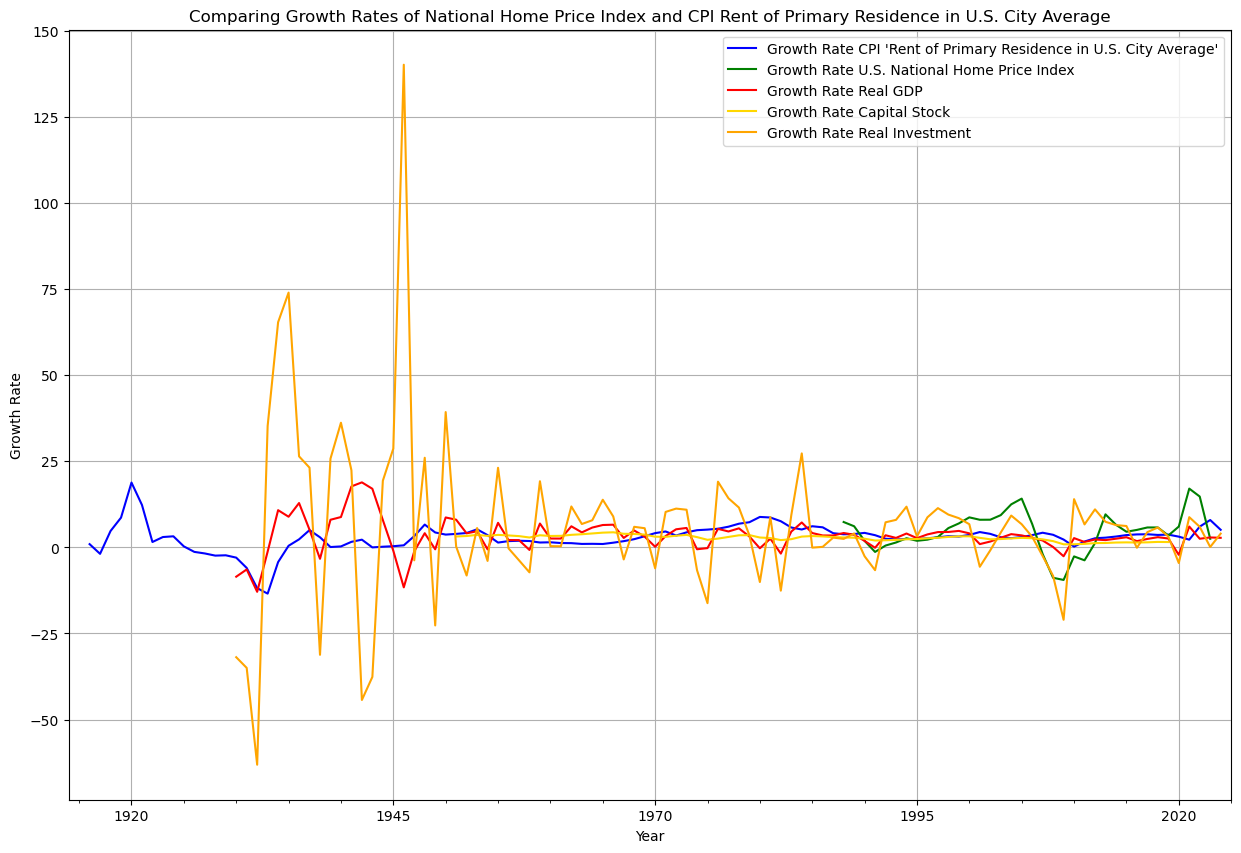

In [128]:
fred.get_series('CUUR0000SEHA', units='pc1', frequency='a').plot(figsize=(15, 10), label="Growth Rate CPI 'Rent of Primary Residence in U.S. City Average'", color='blue')
fred.get_series('CSUSHPINSA', units='pc1', frequency='a').plot(figsize=(15, 10), label='Growth Rate U.S. National Home Price Index', color='green')
fred.get_series('GDPCA', units='pc1', frequency='a').plot(figsize=(15, 10), label='Growth Rate Real GDP', color='red')
fred.get_series('RKNANPUSA666NRUG', units='pc1', frequency='a').plot(figsize=(15, 10), label='Growth Rate Capital Stock', color='gold')
fred.get_series('GPDICA', units='pc1', frequency='a').plot(figsize=(15, 10), label='Growth Rate Real Investment', color='orange')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Comparing Growth Rates of National Home Price Index and CPI Rent of Primary Residence in U.S. City Average');
plt.legend()
plt.grid(True)
plt.show()